In [1]:
import pandas
import pyodbc
import matplotlib.pyplot as plt

In [7]:
server = "ey-finance.database.windows.net"
database = "finance"
username = "我的帳號"
password = "我的密碼"
driver = "{ODBC Driver 17 for SQL Server}"

conn = pyodbc.connect(f"DRIVER={driver};SERVER={server};PORT=1433;DATABASE={database};UID={username};PWD={password}")
symbol = "2330"
cursor= conn.cursor()

query = f"SELECT TradeDate, ClosePrice FROM [dbo].[DailyPrice] WHERE Symbol ='{symbol}';"
df = pandas.read_sql(query, conn, index_col="TradeDate")
print(df.head(10)) #印出來看看

            ClosePrice
TradeDate             
2018-07-23       241.0
2018-05-02       223.0
2010-12-27        70.7
2016-06-07       162.0
2013-10-16       106.0
2011-12-16        72.7
2014-01-10       102.0
2010-07-26        62.6
2019-05-17       241.5
2010-10-12        61.0


<AxesSubplot:xlabel='TradeDate'>

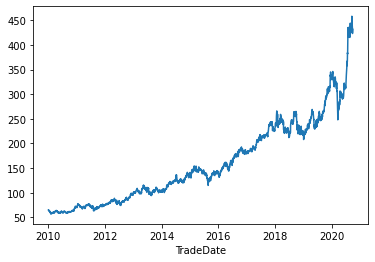

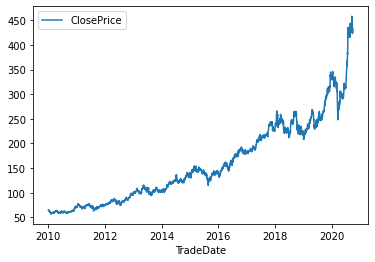

In [8]:
pic = df["ClosePrice"]
pic.plot()
df.plot()

In [10]:
# 近20日收盤
c_price_20 = pic.rolling(20, min_periods=1).mean()
c_price_20_2 = df.rolling(20, min_periods=1).mean()

<AxesSubplot:xlabel='TradeDate'>

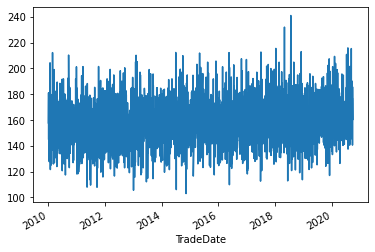

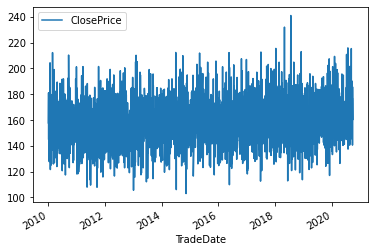

In [6]:
# 印出20日均線
c_price_20.plot()
c_price_20_2.plot()